<a href="https://colab.research.google.com/github/anshika-pathakk/ML-Lab_Experiments/blob/main/Experiment_3Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam (4).csv


In [ ]:
df = pd.read_csv("spam.csv")
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape


(5572, 2)

In [ ]:
#check null values
df.isna().sum()

,0
Category,0
Message,0


In [ ]:
#find duplicates and drop (inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
#now it should be false
df.duplicated().any()


np.False_

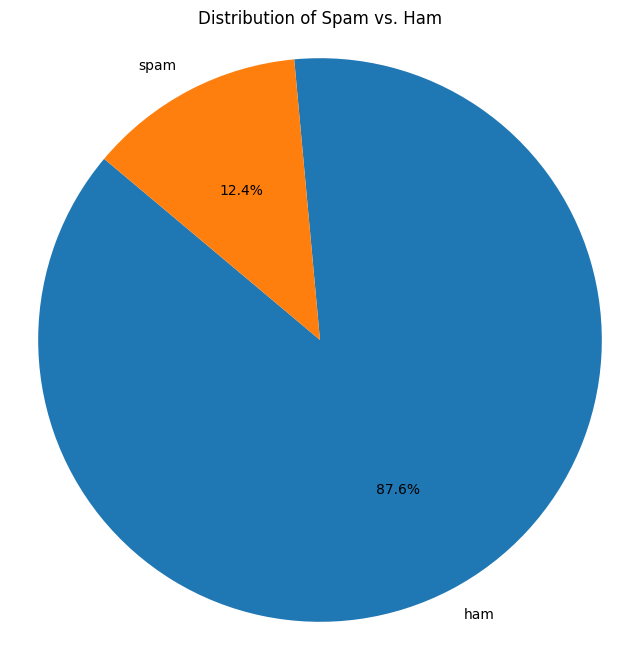

In [ ]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#TEXT VISUALIZATION

- Iterate through unique categories: This loop iterates through each unique category in the 'Category' column of the DataFrame df.¶
- Filter the DataFrame for the current category: Inside the loop, the code filters the DataFrame df to create a new DataFrame filtered_df containing only the rows where the 'Category' column matches the current category.
- Concatenate all text data for the current category: The code then concatenates all the text data from the 'Message' column of filtered_df into a single string variable named text.
- Generate word cloud: Using the concatenated text data (text), the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.
- Plot the word cloud: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current category being processed. The plt.axis('off') command is used to hide the axes of the plot.
This process repeats for each unique category, generating a separate word cloud for each category based on the text data associated with that category.

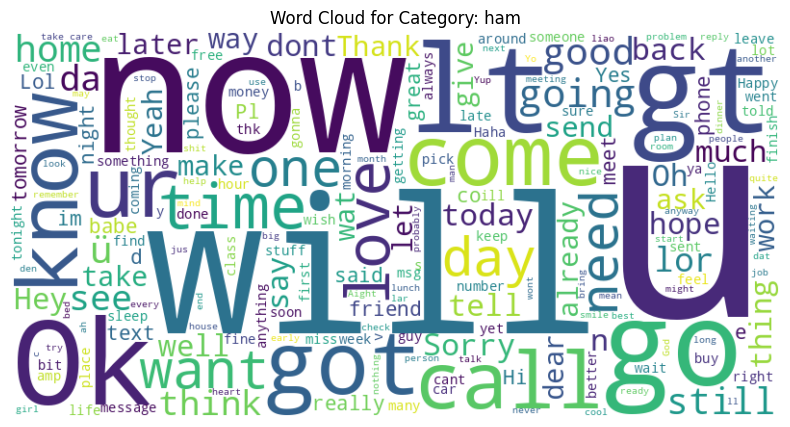

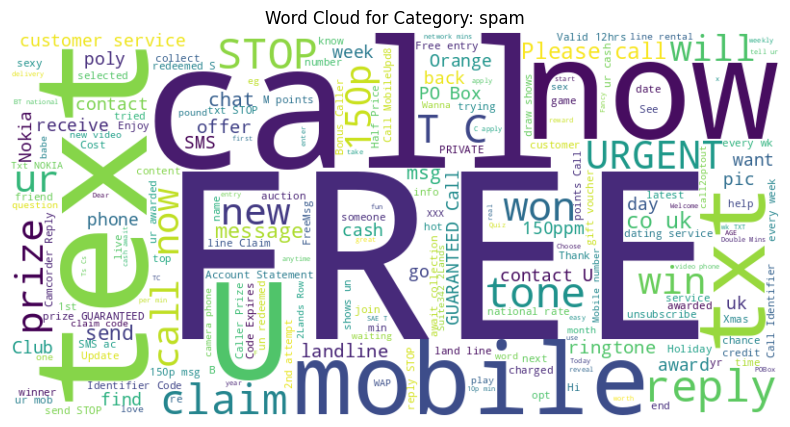

In [ ]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [ ]:
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#Text Preprocessing

1. Lower Casing¶
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric

10. Handling StopWords¶
11. Handling Emojis
12. Stemming



In [ ]:
# Convert 'Text' column to lowercase

df['Message']=df['Message'].str.lower()
print(df)


      Category                                            Message
0            0  go until jurong point, crazy.. available only ...
1            0                      ok lar... joking wif u oni...
2            1  free entry in 2 a wkly comp to win fa cup fina...
3            0  u dun say so early hor... u c already then say...
4            0  nah i don't think he goes to usf, he lives aro...
...        ...                                                ...
5567         1  this is the 2nd time we have tried 2 contact u...
5568         0               will ü b going to esplanade fr home?
5569         0  pity, * was in mood for that. so...any other s...
5570         0  the guy did some bitching but i acted like i'd...
5571         0                         rofl. its true to its name

[5157 rows x 2 columns]


In [ ]:


# Remove extra white spaces from the 'Text' column
df['Message']=df['Message'].str.strip()



In [ ]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    return  BeautifulSoup(text, "html.parser").get_text()


# Remove HTML tags from 'Text' column
df['Message'] = df['Message'].apply(remove_html_tags)

print(df.isna().sum())

Category    0
Message     0
dtype: int64


In [ ]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    return re.sub(r'http\S+|www\.\S+|https\S+', '', text)

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_urls)

print(df.isna().sum())



Category    0
Message     0
dtype: int64


In [ ]:
def remove_special_characters(text):
    # Define the pattern to match special characters
    return re.sub(r'[^A-Za-z0-9\s]','',text)

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)

print(df.isna().sum())



Category    0
Message     0
dtype: int64


In [ ]:
# Function to remove numeric values from text
def remove_numeric(text):
    return re.sub(r'\d+','',text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_numeric)

print(df.isna().sum())

Category    0
Message     0
dtype: int64


In [ ]:

# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^A-Za-z0-9\s]','',text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

print(df.isna().sum())



Category    0
Message     0
dtype: int64


In [ ]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [ ]:
# Function to replace chat words with their full forms
def replace_chat_words(text):

    if text is None:
        print("chutiya")
    text=text.split()
    for i in range(len(text)):
        text[i]=chat_words.get(text[i],text[i])

    return ''.join(text)

print(df.isna().sum())
# Apply replace_chat_words function to 'Text' column
df['Message'] = df['Message'].apply(replace_chat_words)



Category    0
Message     0
dtype: int64


In [ ]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)


In [ ]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
df.head()

,Category,Message,Message_stemmed
0,0,gountiljurongpointcrazyavailableonlyinbugisngr...,gountiljurongpointcrazyavailableonlyinbugisngr...
1,0,oklarjokingwifuoni,oklarjokingwifuoni
2,1,freeentryinawklycomptowinfacupfinaltktsstmayte...,freeentryinawklycomptowinfacupfinaltktsstmayte...
3,0,udunsaysoearlyhorucalreadythensay,udunsaysoearlyhorucalreadythensay
4,0,nahidontthinkhegoestousfhelivesaroundherethough,nahidontthinkhegoestousfhelivesaroundherethough


In [ ]:
#Convert text to numbers using bag of words
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']


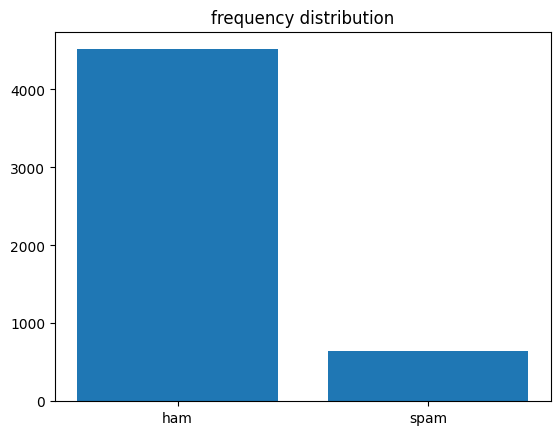

In [ ]:
plt.bar(['ham','spam'],[val for val in y.value_counts()])
plt.title("frequency distribution")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import math
from tqdm import tqdm

In [ ]:
X_train, X_test , Y_train, Y_test = train_test_split(X,y,test_size = 0.2, random_state = 42 , stratify=y)


#Solve this problem using Logistic Regression(using numpy from scratch)

In [ ]:
class LogisticRegression:

    def __init__(self,numFeatures:int,bias:bool,alpha:float,val_freq:int,earlyStop:bool):

        np.random.seed(52)
        self.weights=np.random.randn(1,numFeatures)
        if bias:
            self.bias=np.random.randn(1,1)
        else:
            self.bias=None

        self.alpha=alpha
        self.val_freq=val_freq
        self.earlyStop=earlyStop

        self.lastEpoch=None

    def forward(self,X:np.array,activation=True):

        if activation:
            return 1/(1+np.exp(-np.squeeze((X)@(self.weights.T) +(self.bias if self.bias else 0),axis=-1)))

        return np.squeeze((X)@(self.weights.T) +(self.bias if self.bias else 0),axis=-1)

    def loss(self,X:np.array,Y:np.array):

        preds=self.forward(X)
        # print(Y.shape,preds.shape)
        loss=-(Y*np.log(preds)+(np.array([1])-Y)*np.log(np.array([1])-preds))

        if np.isnan(loss).any():
            print("loss is nan")

        return np.mean(loss)

    def updateParams(self,X:np.array,Y:np.array):

        pred=self.forward(X)
        dw=np.mean( (np.expand_dims(pred-Y,axis=-1))*X,axis=0)
        self.weights-=self.alpha*np.expand_dims(dw,axis=0)

        if self.bias:
            db=np.mean(pred-Y)
            self.bias-=self.alpha*db

    def train(self,epochs:int,batch_size:int,X:np.array,Y:np.array,X_val:np.array,Y_val:np.array):
        self.losses=[]
        self.val_losses=[]
        pbar=tqdm(range(epochs))
        min_train_loss=np.inf

        for epoch in pbar:
            loss=0
            for i in range(0,X.shape[0],batch_size):

                self.updateParams(X[i:i+batch_size,:],Y[i:i+batch_size])
                loss+=self.loss(X[i:i+batch_size,:],Y[i:i+batch_size])

            loss/=math.ceil(X.shape[0]/batch_size)
            loss=round(loss,4)
            self.losses.append(loss)

            if (epoch+1) % self.val_freq==0:
                val_loss=self.loss(X_val,Y_val)
                val_loss=round(val_loss,4)
                self.val_losses.append(val_loss)

            if len(self.val_losses):
                pbar.set_postfix({'train loss':f'{loss:.4f}'
                                  ,'val loss':f'{self.val_losses[-1]:.4f}'})
            else:
                pbar.set_postfix({'train loss':f'{loss:.4f}'})

            #early Stopping
            if self.earlyStop:
                if(loss<min_train_loss):
                    minima=epoch
                min_train_loss=min(min_train_loss,loss)

                if(epoch-minima>8 or (len(self.val_losses) and (self.val_losses[-1]-min_train_loss)>0.1*minima)):
                    print("triggering early stopping........")
                    print("REASON:",end="")
                    if epoch-minima>20:
                        print("train loss saturation")
                    else:
                        print("overfitting")
                    self.lastEpoch=epoch
                    break

        print("training complete!!")

In [ ]:
val_freq=50
epochs=10000
num_features=X_train.shape[1]
bias=True
learningRate=0.01
batch=2**7
earlyStop=True
classifier=LogisticRegression(num_features,bias,learningRate,val_freq,earlyStop)


print(X_train.shape)

classifier.train(epochs,batch,X_train,Y_train,X_test,Y_test)
print("final params")
print(classifier.weights,classifier.bias)

(4125, 5076)


 28%|██▊       | 2841/10000 [15:46<39:44,  3.00it/s, train loss=0.3929, val loss=0.4078]

triggering early stopping........
REASON:overfitting
training complete!!
final params
[[ 0.48657225 -1.27524754  0.21442491 ...  0.03281806  0.95466402
  -0.90478336]] [[-2.28558112]]


Text(0.5, 1.0, 'loss curve')

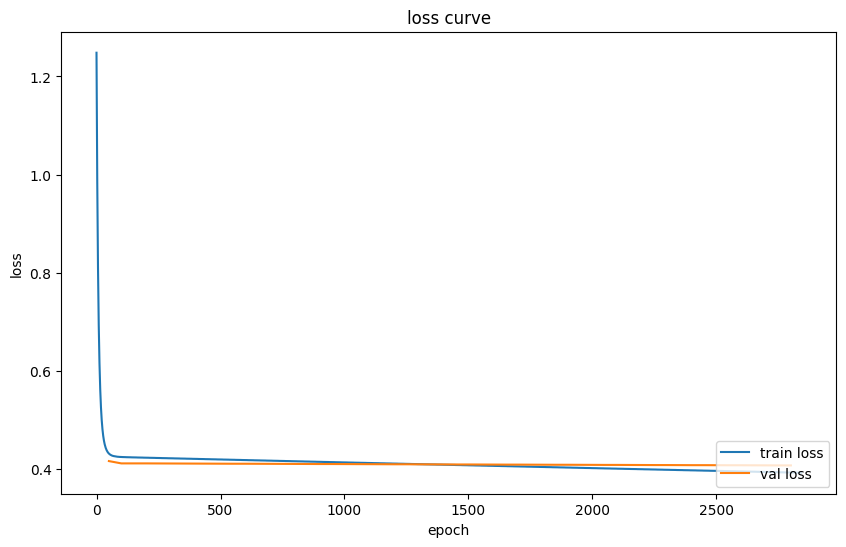

In [ ]:
epochs=classifier.lastEpoch if classifier.lastEpoch is not None else epochs


fig = plt.figure(figsize=(10, 6))

plt.plot(classifier.losses,label="train loss")

plt.plot(np.arange(val_freq,epochs+1 if epochs%val_freq==0 else epochs+2,val_freq),classifier.val_losses,label="val loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(loc="lower right")
plt.title("loss curve")



EVALUATION:-

1.ROC AUC

2.Confusion Matrix

3.Accuracy

4.F1 Score

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


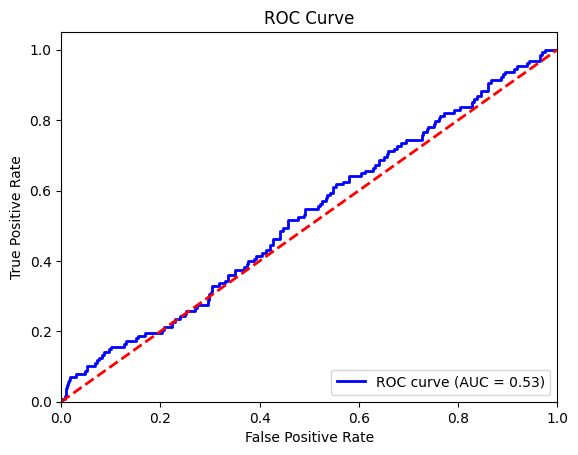

In [ ]:
Y_pred=classifier.forward(X_test)

fpr, tpr, thresholds=roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

Text(0.5, 1.0, 'Confusion Matrix [accuracy:0.8731]')

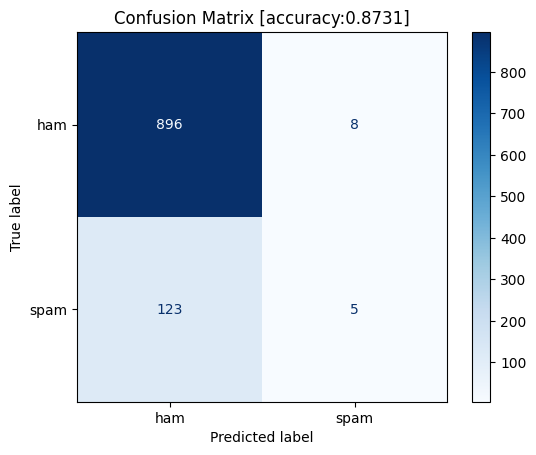

In [ ]:
preds=np.zeros_like(Y_pred)
preds[Y_pred>0.5]=1
cm = confusion_matrix(Y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['ham','spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix [accuracy:{((preds==Y_test).sum()/preds.shape[0]):.4f}]")

#Now Use sklearn library to fit the data using logistic regression and compare results

In [ ]:
from sklearn.linear_model import LogisticRegression
LRsklearn = LogisticRegression()
LRsklearn.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression
sklearnClassifier = LogisticRegression()
sklearnClassifier.fit(X_train, Y_train)
preds = sklearnClassifier.predict(X_test)
probs = sklearnClassifier.predict_proba(X_test)



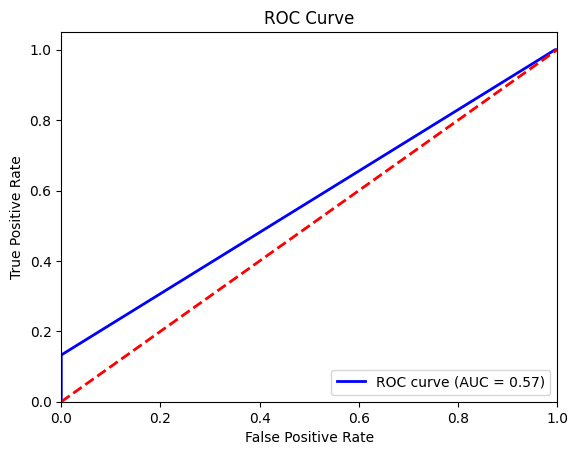

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
Y_probs_sklearn = LRsklearn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_probs_sklearn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


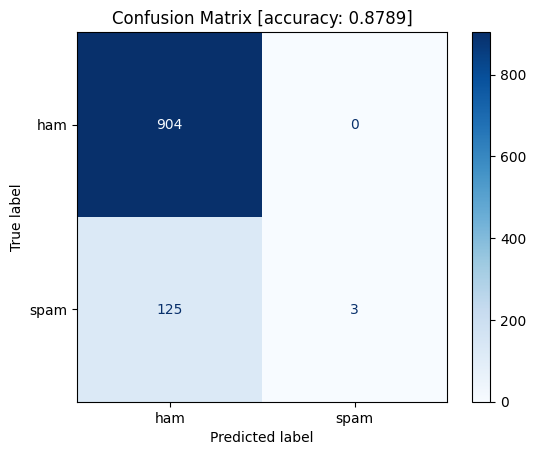

In [ ]:
Y_probs_sklearn = LRsklearn.predict_proba(X_test)[:, 1]

preds_sklearn = np.zeros_like(Y_probs_sklearn)
preds_sklearn[Y_probs_sklearn > 0.5] = 1

cm = confusion_matrix(Y_test, preds_sklearn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
disp.plot(cmap=plt.cm.Blues)
accuracy = (preds_sklearn == Y_test).sum() / preds_sklearn.shape[0]
plt.title(f"Confusion Matrix [accuracy: {accuracy:.4f}]")
plt.show()
